SAS & HSE, Applied Time Series Forecasitng , Fall 2021 

<font color="blue"> HW #1 </font>

<span style="color:black; font-size: 12pt"></span>

Alexey Romanenko,
<font color="blue">alexromsput@gmail.com</font>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Лукишн Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.
- https://otexts.com/fpp2/expsmooth.html

**Оформление дз**: 
- Присылайте выполненное задание в систему приема заданий HSE
- Выполненное дз сохраните в файл ``<Surname>_<fall2021>_hw1.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы в slack в соответствующий канал

**Deadilne**: <font color="red"> 8-Oct-2021 11:59:59 pm CET </font>

В случае присланного решения позже дедлайна максимальный бал буде снижен согласно формуле

$$МаксимальныйБалл=\max\bigl(1/3,\log_2⁡(1.23 + 0.77 * max(0,(1-ДнейПослеДедлайна/14))) \bigr).$$
График зависимости максимально возможного балла за ДЗ от просрочки дедлайна приведён ниже:

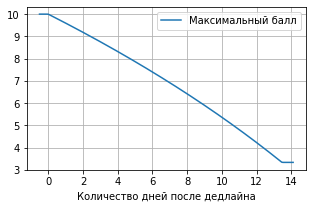

In [27]:
import pandas as pd
import numpy as np
a = 2
ax = pd.DataFrame(data = [[x, min(10, 10*max(1/3, np.log(a-0.77 + 0.77*max(0, (1-x/14)))/np.log(a)))] for x in np.linspace(-0.5,14.1,200)], columns = ['Количество дней после дедлайна', 'Максимальный балл']).set_index('Количество дней после дедлайна').plot(figsize = (5,3), grid = True)

<h1 align="center">Check Questions (5%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Опишите, как изменяется адаптивная способность алгоритма Simple Exponential Smoothing при изменении параметра $\alpha$ от 0 до 1.

<Ответ>

**Вопрос 2**: Напишите, в чем отличие между терминами delay (отсрочка) и horizon (горизонт) прогнозирования.

<Ответ>

**Вопрос 3**: Каким следует выбрать параметр сглаживания тренда $\alpha_2$ в модели Хольта (линейный тренд) в случае, когда вы предсказываете временной ряд 1) с плавно меняющимя трендом; 2) стохастически меняющися трендом?

<Ответ>


<h1 align="center"> Practice</h1>
#  1. reading data (5%)

Download data and prepare for following time series 
 * <span style="color:blue; font-family:'New Times Roman'; font-size:14pt"> description of the target ts you can find here  https://gist.github.com/aromanenko/1413f002481065bf38ffec0eba566037 </span>

In [ ]:
# start with this code
import pandas as pd
import numpy as np
from utils import InitExponentialSmoothing, build_forecast, plotTSForecast
from utils import qualityRMSE, qualityMedianAE, qualityMACAPE, qualitySSE, qualityMSE, qualityMAPE 

%matplotlib inline


# ts = pd.read_csv('???/mothly_ts.csv', sep=???, decimal=???, index_col=???, parse_dates=True, dayfirst=True)

# # Put your code below
# ts.plot(figsize=(15,5))

# 2. Build the Forecast with  IES (5%)

You need to apply SES model (see seminar 2) for the TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-ts.csv</span>.

Forecast delay $h=1$ for all point in this task.


* 0) Forecast the ts with SES $\alpha=.1$.
* 1) Split the ts to 4 equal parts: find the best param $\alpha$ of SES for the based on 3-rd part of ts (e.g. if time series includes date from 01Jan2020 till 31Dec2021 then 3rd part will be from 1Jul2020 till 30Sep2020). Is the optimal value close to 0 or 1? (use MAPE as a loss function).
* 2) Draw the forecast that correspond to SES with optimial value $\alpha$
     Conclude whether SES can be used for this TS? If can not than explain why.
* 3) Calculate MAPE loss of the best forecast of the ts based on 4-th part of the ts.

## 1) Search for the optimal $\alpha$ 

In [ ]:
ALPHA = ???
ESParamsArray = [{'alpha':alpha} for alpha in ALPHA]
FRC_ts = build_forecast(h=1, ts=???, alg_name =  ???, alg_title=???,params_array = ESParamsArray)

In [ ]:
# compare ES parameters
QualityStr = pd.DataFrame(index = ts.columns, columns = FRC_ts.keys())

ix = ts.loc[???].index
for param_cntr in sorted(QualityStr.columns):
    frc_ts = FRC_ts[param_cntr]
    QualityStr[param_cntr],_ = quality???(ts.loc[ix], frc_ts.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

## 2) draw the forecast with optimial value $\alpha $

In [ ]:
alg_name = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(ts.loc[???], FRC_ts[alg_name].loc[???]
               , ts_num=???, alg_title=???)

** Question**
    * Does SES follow to the TS components?

## 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]

In [ ]:
quality???(ts.loc[???], FRC_ts[alg_name].loc[???])[0]

# 3. Winters model for Additive Seasonality (25%)
You need to realize ES model for TS with additive seasonality and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-ts.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Winters model for Seasonal TS
* 2) Find optimal params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw the forecast that correspond optimal values $\alpha$ and $\gamma$ (data from 09.1998 to 01.2017). 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of IES: is it better? 
* 5) Conclude whether Winter's ES can be used for this TS?

In [ ]:
# Start with this code
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter

def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = ## put foreast of the model here
    
    l= # initialize ts level 
    s= # initalize seasonality values (it must be vector of lenth p)
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= # initialize 
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= # initialize 
 
            l = # recurrent smoothing of level 
            s[cntr % p] = # recurrent smoothing of seasonality
            
        FORECAST[cntr+h] = a + b[cntr+h % s]
    return FORECAST

In [ ]:
# Put your code here


# 4. Theil-ts model for TS with linear trend and seasonality (25%)
You need to realize Theil-ts model and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-ts.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-ts model for
* 2) Find optimal params $\alpha$ (smoothing of level), $\beta$ (smoothing trend) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model: is it better than the last one? 
* \*5) Suggest how can the Theil-ts model be improved to make accuracy of forecast better?

In [ ]:
# Put your code here

# 5. Non-additive model of ES (25%)
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-ts.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M) model.
* 2) Find optimal params of the model (use data from 09.1998 to 01.2015). Note: if you choose damped trend model that $\phi$ you can just set it by expert opinion (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params (data from 09.1998 to 01.2017). 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model and Theil-ts model: is it better than the last one? 
* 5) Is it true that multiplicative model are more unstable than additive? Unstable means thet forecast is can diveret

In [ ]:
# Put your code here